<h1>Problem

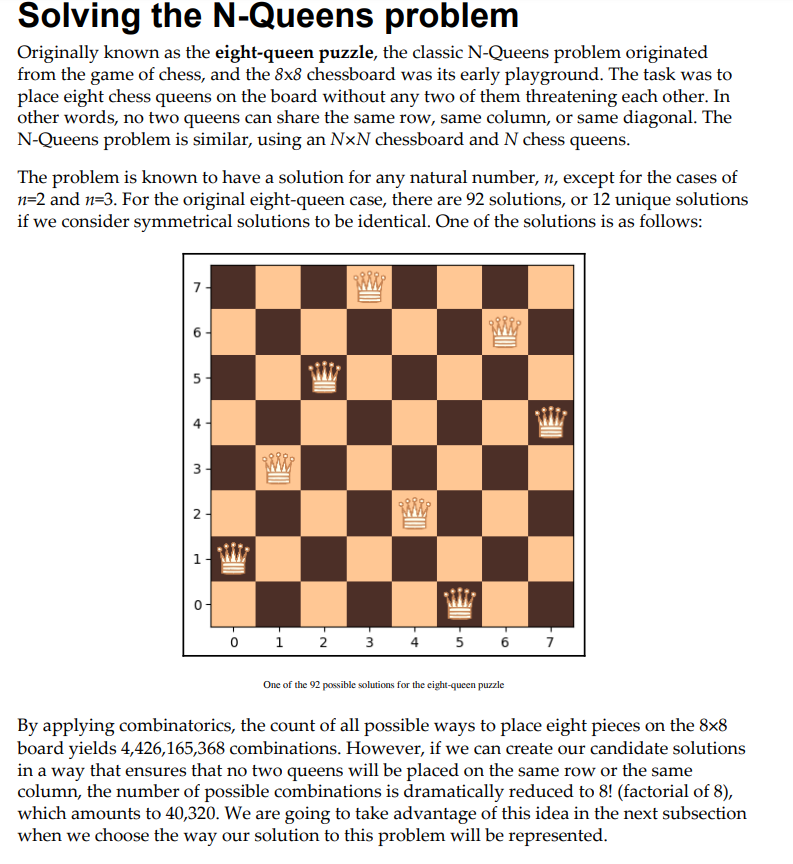

In [3]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 160 kB 5.2 MB/s 


<h1> Understanding the problem

In [4]:
# Defining a possible solution
possible_solution = [1, 2, 7, 5, 0, 3, 4, 6]
# Each dimension of list represent a raw in the chess board
# And each value represent the column that the queen is

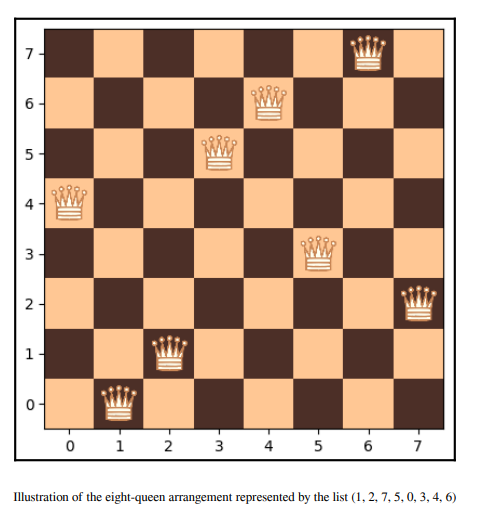

In [5]:
# We want to find a solution or a group of solutions where queens are not threatened

<h1>Solving the problem

In [86]:
from deap.tools.init import initRepeat
from deap import creator, base, tools, algorithms
import numpy as np
import random

# STRUCTURE
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("ChromosomeStruct", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()


# GENE, CHROMOSOME, INDIVIDUAL, POPULATION
QUEENS_NUMBER = 32 # PUT HERE THE NUMBER OF QUEENS
def chromosome(CHROMOSOME_LENGTH):
  chromosome = random.sample([i for i in range(CHROMOSOME_LENGTH)], k=CHROMOSOME_LENGTH)
  return chromosome
toolbox.register("Chromosome", chromosome, CHROMOSOME_LENGTH=QUEENS_NUMBER)
toolbox.register("Individual", tools.initIterate, creator.ChromosomeStruct, toolbox.Chromosome)
toolbox.register("PopulationCreator", tools.initRepeat, list, toolbox.Individual)


# GENETIC OPERATORS
def fitness_function(individual):
  violations = 0
  for x,y in enumerate(individual, start=0):
    for x2, y2 in enumerate(individual, start=0):
      if abs(x-x2) == abs(y - y2) == 0:
        pass
      elif abs(x-x2) == abs(y-y2):
        violations += 1
  return int(violations/2),
toolbox.register("evaluate", fitness_function)
toolbox.register("select", tools.selTournament, tournsize=20)
toolbox.register("mate", tools.cxUniformPartialyMatched, indpb=2/QUEENS_NUMBER)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=2/QUEENS_NUMBER)


# STORING THE INFORMATION
stats = tools.Statistics(lambda population: population.fitness.values)
stats.register("max", np.max)
stats.register("min", np.min)
stats.register("mean", np.mean)
hof = tools.HallOfFame(5)

# CONTROL PANEL
POPULATION_SIZE = 200
PROBABILITY_CROSSOVER = 1
PROBABILITY_MUTATION = 0.2
MAX_GENERATIONS = 100 # (stopping condition)
random.seed(42)

# EVOLVING THE SOLUTION
generationCounter = 0
population = toolbox.PopulationCreator(n=POPULATION_SIZE)
result, log = algorithms.eaSimple(population,
                                  toolbox,
                                  cxpb=PROBABILITY_CROSSOVER,
                                  mutpb=PROBABILITY_MUTATION,
                                  stats=stats,
                                  ngen=MAX_GENERATIONS,
                                  halloffame=hof,
                                  verbose=True)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'ChromosomeStruct' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	max	min	mean 
0  	200   	35 	12 	21.28
1  	200   	23 	9  	15.41
2  	200   	26 	8  	13   
3  	200   	21 	8  	11.565
4  	200   	22 	7  	9.275 
5  	200   	22 	5  	8.63  
6  	200   	18 	5  	7.76  
7  	200   	16 	5  	6.155 
8  	200   	14 	4  	5.745 
9  	200   	15 	3  	5.8   
10 	200   	12 	3  	4.46  
11 	200   	14 	3  	3.65  
12 	200   	14 	3  	3.74  
13 	200   	16 	3  	4.05  
14 	200   	17 	3  	3.925 
15 	200   	15 	3  	3.705 
16 	200   	12 	3  	3.735 
17 	200   	13 	3  	3.715 
18 	200   	15 	3  	3.585 
19 	200   	14 	2  	3.86  
20 	200   	14 	2  	3.68  
21 	200   	17 	2  	3.12  
22 	200   	17 	2  	2.775 
23 	200   	11 	2  	2.71  
24 	200   	14 	2  	2.755 
25 	200   	17 	2  	2.71  
26 	200   	15 	2  	2.735 
27 	200   	13 	2  	2.71  
28 	200   	15 	2  	2.805 
29 	200   	12 	2  	2.935 
30 	200   	14 	2  	2.855 
31 	200   	13 	2  	2.93  
32 	200   	17 	2  	2.86  
33 	200   	12 	2  	2.985 
34 	200   	11 	2  	2.595 
35 	200   	12 	2  	3.03  
36 	200   	11 	2  	2.775 
37 	200   	11 	2

<h1> Plotting results

In [97]:
def plotting_board(solution):
  import matplotlib.pyplot as plt
  import matplotlib as mpl


  # Board
  QUEENS_NUMBERS = len(solution)
  fig, ax = plt.subplots(figsize=(13, 13))
  board = np.zeros((QUEENS_NUMBERS, QUEENS_NUMBERS))
  board[::2, 1::2] = 1
  board[1::2, ::2] = 1
  ax.imshow(board, interpolation='none', cmap=mpl.colors.ListedColormap(['#ffc794', '#4c2f27']))

  # Queens
  queenThumbnail = plt.imread('queen-thumbnail.png')
  thumbnailSpread = 0.70 * np.array([-1, 1, -1, 1]) / 2 
  for i, j in enumerate(solution):
      ax.imshow(queenThumbnail, extent=[j, j, i, i] + thumbnailSpread)

  # Adjustments
  ax.set(xticks=list(range(QUEENS_NUMBERS)), yticks=list(range(QUEENS_NUMBERS)))
  ax.axis('image')   # scale the plot as square-shaped
  plt.show()


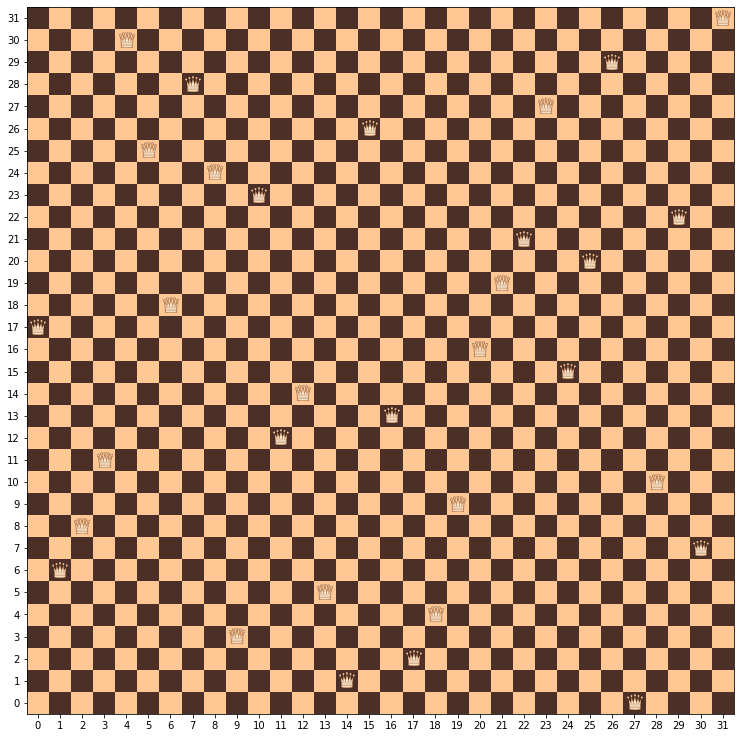

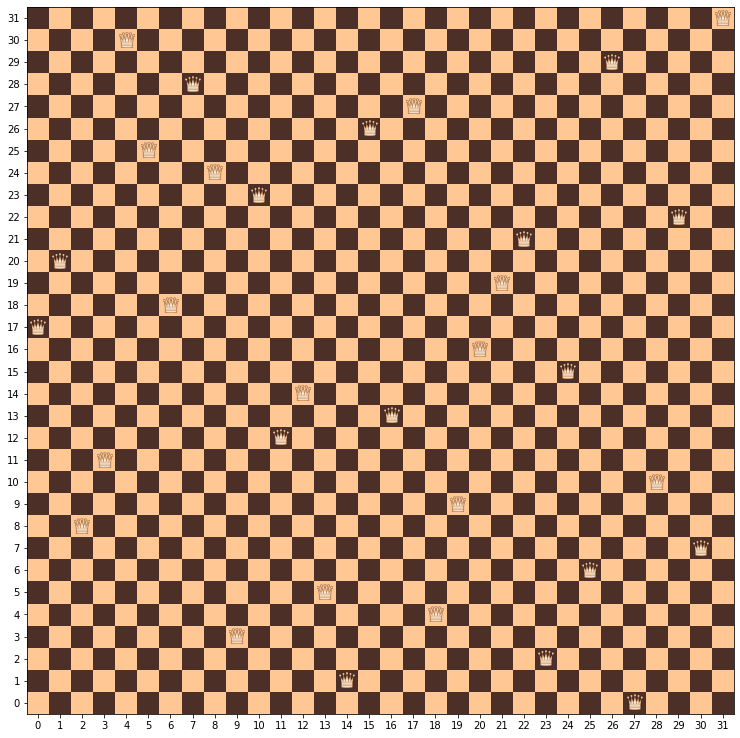

In [98]:
for i in hof[:2]:
  plotting_board(i)

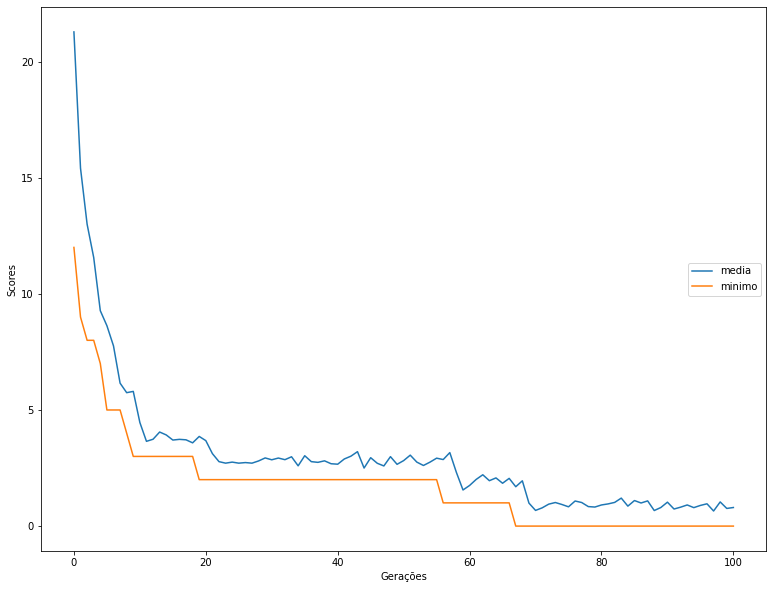

In [99]:
import matplotlib.pyplot as plt

# taking data
y_mean = log.select("mean")
y_min = log.select("min")
#y_max = log.select("max")
#y_std = log.select("std")
x_gen = log.select("gen")


#plotting
plt.figure(figsize=(13,  10))
plt.plot(x_gen, y_mean, label="media")
plt.plot(x_gen, y_min, label="minimo")
#plt.plot(x_gen, y_max, label="maximo")
#plt.plot(x_gen, y_std, label="std")

plt.xlabel("Gerações")
plt.ylabel("Scores")
plt.legend(loc=5)
plt.show()